<a href="https://colab.research.google.com/github/Joracosu/03MAIR---Algoritmos-de-Optimizacion---2019/blob/master/AG2/Jos%C3%A9_Ram%C3%B3n_Conde_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad Guiada 2 de Algoritmos de Optimización

José Ramón Conde Suárez

https://colab.research.google.com/drive/1EssAOfHf9s0kPjeDuJQrmyuqPq8EKUS0

##Programación Dinámica

In [0]:
###############################################
def Precios(TARIFAS):
###############################################
  #Total de Nodos
  N = len(TARIFAS[0])

  # Inicialización de la tabla de precios
  PRECIOS = [ [9999] * N for i in [9999] * N ]
  RUTA = [ [''] * N for i in [''] * N ]

  for i in range(N - 1):
    for j in range(i + 1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k]+ TARIFAS[k][j] < MIN:
          MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j])
          RUTA[i][j] = k
        PRECIOS[i][j] = MIN
  
  return PRECIOS, RUTA

def calcular_ruta(RUTA, desde, hasta):
  if desde == hasta:
    #print('Ir a :' + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) + ',' + str(RUTA[desde][hasta])

TARIFAS = [
           [  0,  5,  4,  6,999,999,999],
           [999,  0,999,  2,  3,999, 11],
           [999,999,  0,  6,999,  4, 10],
           [999,999,999,  0,  5,  6,  9],
           [999,999,999,999,  0,999,  4],
           [999,999,999,999,999,  0,  3],
           [999,999,999,999,999,999,  0]
]
PRECIOS, RUTA = Precios(TARIFAS)

print(PRECIOS)
print(RUTA)
print('\nLa ruta es:')
calcular_ruta(RUTA, 0, 6)

[[9999, 5, 4, 6, 8, 8, 11], [9999, 9999, 999, 2, 3, 8, 7], [9999, 9999, 9999, 6, 11, 4, 7], [9999, 9999, 9999, 9999, 5, 6, 9], [9999, 9999, 9999, 9999, 9999, 999, 4], [9999, 9999, 9999, 9999, 9999, 9999, 3], [9999, 9999, 9999, 9999, 9999, 9999, 9999]]
[['', 0, 0, 0, 1, 2, 5], ['', '', 1, 1, 1, 3, 4], ['', '', '', 2, 3, 2, 5], ['', '', '', '', 3, 3, 3], ['', '', '', '', '', 4, 4], ['', '', '', '', '', '', 5], ['', '', '', '', '', '', '']]

La ruta es:


'0,0,2,5'

## Ramificación y Poda

Se han añadido comentarios en el código para explicar la complejidad del algoritmo por fuerza bruta <br>
\begin{align}
\ 2 + k!(k + 2 + 3) = 2 + (5 + k)k! ----> O(n!)
\end{align}
 

In [0]:
import itertools
COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]

# función objetivo
def valor(S,COSTES):
  VALOR = 0   # una operación
  for i in range(len(S)): VALOR += COSTES[S[i]][i]  # dimension operaciones
  return VALOR  # una operación   ---> EN TOTAL: dimensión de S + 2 operaciones

def fuerza_bruta(COSTES):
  mejor_valor = 10e10   # una operación
  mejor_solucion = ()   # una operación
  for s in list(itertools.permutations(range(len(COSTES)))):  # factorial de dimensión
    valor_tmp = valor(s, COSTES)  # dimensión de S + 2 operaciones
    if valor_tmp < mejor_valor: # una operación
      mejor_valor = valor_tmp # una operación
      mejor_solucion = s  # una operación
  print('La mejor solución por FB es :', mejor_solucion, 'con valor :', mejor_valor)
        # ORDEN DE COMPLEJIDAD:
# ----->  2 + k!*(k + 2 + 3) = 2 + (5 + k) * k! ~> O(n!) <------


def CI(S, COSTES):
  VALOR = 0
  # Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]

  # Estimación
  for i in range(len(COSTES)):
    if i not in S:
      VALOR += min([COSTES[j][i] for j in range(len(S),len(COSTES))])
  return VALOR

def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N):
    if i not in NODO:
      HIJOS.append({'s' : NODO + (i, )})
  return HIJOS

def ramificacion_y_poda(COSTES):
# Construcción iterativa de soluciones (arbol). En cada etapa asignamos un agente (ramas).
# Nodos del grafo {'s' : (1, 2), CI : 3, CS : 5}
  # print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION = tuple(i for i in range(len(COSTES)))
  CotaSup = valor(MEJOR_SOLUCION, COSTES)
  # print('Cota superior :', CotaSup)
  NODOS = []
  NODOS.append({'s':(), 'ci' : CI((), COSTES)})

  iteracion = 0


  while( len(NODOS)>0):
    iteracion += 1

    nodo_prometedor = [min(NODOS, key=lambda x:x['ci'])][0]['s']
    # print('Nodo prometedor :', nodo_prometedor)

    # Ramificación
    # Se generan los hijos
    HIJOS = [ {'s':x['s'], 'ci' : CI(x['s'], COSTES)} for x in crear_hijos(nodo_prometedor, DIMENSION)]
    
    # Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION]
    if len(NODO_FINAL) > 0:
      # print('\n********Soluciones :', [x for x in HIJOS if len(x['s']) == DIMENSION])
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    # Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup]

    # Añadimos los hijos
    NODOS.extend(HIJOS)

    # Eliminamos el nodo ramificado
    NODOS = [x for x in NODOS if x['s'] != nodo_prometedor]

  print('La solución final por RP es:', MEJOR_SOLUCION, 'en', iteracion, 'iteraciones','para dimension', DIMENSION)

fuerza_bruta(COSTES)
ramificacion_y_poda(COSTES)

La mejor solución por FB es : (0, 3, 1, 2) con valor : 61
La solución final por RP es: [{'s': (0, 3, 1, 2), 'ci': 61}] en 19 iteraciones para dimension 4


A continuación se generan matrices con valores aleatorios de mayores dimensiones (5,6,7,…) y se ejecutan ambos algoritmos. La ejecución del código da respuesta a las dos preguntas planteadas:
 - ¿A partir de que dimensión el algoritmo por fuerza bruta deja de ser una opción?  
 - ¿Hay algún valor de la dimensión a partir de la cual el algoritmo de ramificación y poda deja de ser una opción válida?

In [0]:
import time
from random import randint

def matriz_aleatoria(dimension, minimo, maximo):
  # se crea la matriz de tamaño dimension x dimension con valores 0
  COSTES=[[0 for x in range(dimension)] for y in range(dimension)]
  for i in range (0, dimension):
    for j in range (0, dimension):
      # a cada elemento de la matriz se le asigna un numero aleatorio
      COSTES[i][j]=randint(minimo, maximo)
  return COSTES

# Diccionario con los métodos
algoritmos = {'FB': fuerza_bruta,
              'RP': ramificacion_y_poda}
tiempos_anteriores = {'FB':0,'RP':0}  # para analizar si se va a iterar con una dimensión más
ultimo_viable = {'FB':0,'RP':0}       # para escribir el resultado de la última iteración calculada

# bucle para calcular las distintas dimensiones
for i in range(8,16): # para las dimensiones de 8 a 15
  print('Dimensión:',i)
  COSTES = matriz_aleatoria(i,10,30)  #se genera una matriz aleatoria de la dimension deseada
  # para cada tipo de algoritmo
  for acronimo, algoritmo in algoritmos.items():
    if tiempos_anteriores[acronimo] < 10.0:   # se considera que si la última iteración calculada ha tardado más de 10 segundos, ya no es viable aumentar la dimensión
      T1 = time.time()
      algoritmo(COSTES) # se ejecuta el algoritmo que corresponda
      T2 = time.time()
      tiempos_anteriores[acronimo] = T2 - T1
      ultimo_viable[acronimo] = i
      print('El algoritmo',acronimo,'ha necesitado un tiempo total de',round(T2 - T1, 3),'segundos')
    else:
      print('Se considera que el algoritmo',acronimo,'ha superado el umbral de viabilidad para la dimensión', ultimo_viable[acronimo],'con un tiempo de',tiempos_anteriores[acronimo])
  print()

# CONCLUSIONES
print('Dependiendo del azar en la construcción de la matriz de costes, los algoritmos')
print('tendrán diferentes tiempos de resolución, pero siempre será más lento el de fuerza bruta.')
print('De cualquier forma, el algoritmo de ramificación y poda no mejora la resolución de manera espectacular')

Dimensión: 8
La mejor solución por FB es : (5, 0, 4, 2, 6, 7, 3, 1) con valor : 109
El algoritmo FB ha necesitado un tiempo total de 0.047 segundos
La solución final por RP es: [{'s': (7, 1, 4, 2, 0, 6, 3, 5), 'ci': 119}] en 531 iteraciones para dimension 8
El algoritmo RP ha necesitado un tiempo total de 0.039 segundos

Dimensión: 9
La mejor solución por FB es : (4, 5, 7, 3, 0, 6, 8, 2, 1) con valor : 116
El algoritmo FB ha necesitado un tiempo total de 0.453 segundos
La solución final por RP es: [{'s': (4, 5, 7, 3, 0, 1, 8, 6, 2), 'ci': 120}] en 307 iteraciones para dimension 9
El algoritmo RP ha necesitado un tiempo total de 0.021 segundos

Dimensión: 10
La mejor solución por FB es : (2, 3, 5, 0, 7, 8, 4, 1, 6, 9) con valor : 134
El algoritmo FB ha necesitado un tiempo total de 4.699 segundos
La solución final por RP es: [{'s': (2, 3, 5, 0, 7, 8, 4, 1, 6, 9), 'ci': 134}] en 4704 iteraciones para dimension 10
El algoritmo RP ha necesitado un tiempo total de 1.991 segundos

Dimensión:

------------------------------------------------------------
(adicional)
## Descenso del Gradiente

PARABOLOIDE DE REVOLUCIÓN
Punto inicial: [-0.7881812888774968, 1.7315350661501783]


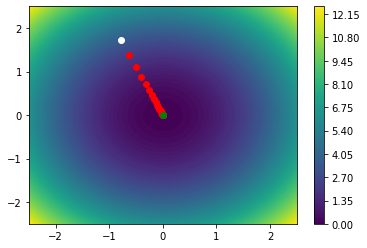

Solución: [-2.7645192389144587e-49, 6.0733007377585435e-49] 4.4527548473586647e-97

OTRA FUNCION A MINIMIZAR
Punto inicial: [-1.35241516228592, 0.3126086703938795]


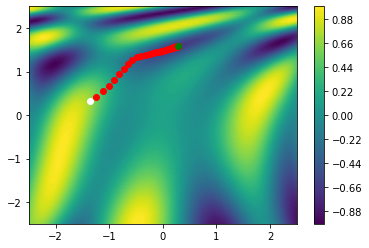

Solución: [0.29029103494958974, 1.5884347142361575] -0.656986736920868


In [0]:
import math
import matplotlib.pyplot as plt
import numpy as np

import random

def descenso_gradiente(f, df):
  # Prepara los datos para dibujar mapa de niveles de Z 
  resolucion = 100
  rango = 2.5
  X = np.linspace(-rango, rango, resolucion)
  Y = np.linspace(-rango, rango, resolucion)
  Z = np.zeros((resolucion, resolucion))
  for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
      Z[iy, ix] = f([x, y])

  # Pinta el mapa de niveles de Z
  plt.contourf(X, Y, Z, resolucion)
  plt.colorbar()

  # Generamos un punto aleatorio
  P = [random.uniform(-2, 2), random.uniform(-2, 2)]
  plt.plot(P[0], P[1], 'o', c = 'white')
  print('Punto inicial:',P)

  # Tasa de aprendizaje
  TA = .1

  # Iteraciones(
  for _ in range(500):
    grad = df(P)
    P[0], P[1] = P[0] - TA * grad[0], P[1] - TA * grad[1]
    plt.plot(P[0], P[1], 'o', c = 'red')

  # Pintamos el gráfico con las iteraciones
  plt.plot(P[0], P[1], 'o', c = 'green')
  plt.show()
  print('Solución:', P, f(P))

print('PARABOLOIDE DE REVOLUCIÓN')
f  = lambda X: X[0] ** 2 + X[1] ** 2  #Funcion
df = lambda X: [2 * X[0], 2 * X[1]]   #Gradiente
descenso_gradiente(f, df)


print('\nOTRA FUNCION A MINIMIZAR')
# sin(1/2 * x^2 - 1/4 * y^2 +3) * cos(2*x + 1 - E^y)
f = lambda X: np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * np.cos(2 * X[0] + 1 - np.e**X[1])
# Aproximamos el valor del gradiente en un punto por su definición
def df(PUNTO):
  h = 0.01
  T = np.copy(PUNTO)
  grad = np.zeros(2)
  for it, th in enumerate(PUNTO):
    T[it] = T[it] + h
    grad[it] = (f(T) - f(PUNTO)) / h
  return grad

descenso_gradiente(f, df)